<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº8
#### Tobías Guerrero

## 1. Introducción

En este trabajo semanal, se pide graficar:

- La densidad espectral de potencia (en adelante, PSD) de los primeros 10 segundos de la señal de ECG.
- La PSD de todas las realizaciones de latidos en una ventana que va desde (R_i - 250 ms - R_i + 350 ms) para los i-ésimos latidos.
- La PSD de todo el registro.

En los tres casos, se realizará mediante el método de Welch.

A partir de los mismos, se buscará estimar el ancho de banda de la señal de ECG.

## 2. Resolución

### 2.1 Gráficos iniciales

Text(0.5, 1.0, 'Complejo QRS')

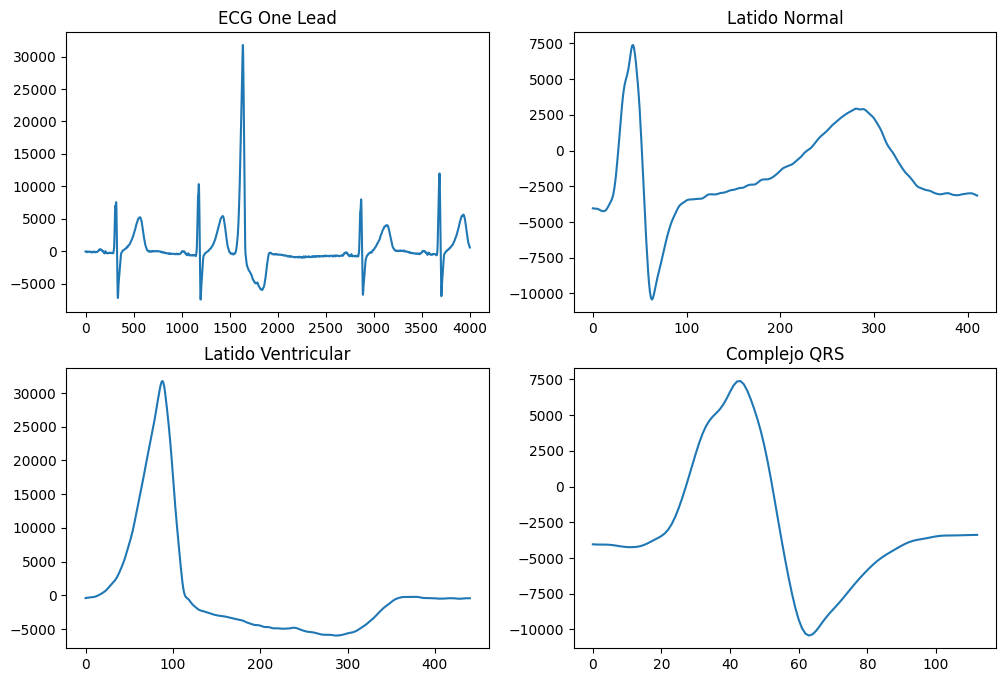

In [1]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

fs_ecg = 1000  # Hz

mat_struct = sp.io.loadmat("./ecg.mat")

ecg_one_lead = mat_struct["ecg_lead"]

N = len(ecg_one_lead)

# Latido normal
hb_1 = mat_struct["heartbeat_pattern1"]
# Latido ventricular
hb_2 = mat_struct["heartbeat_pattern2"]
# Complejo QRS normal
qrs_p1 = mat_struct["qrs_pattern1"]
# Vector de localización de los picos donde ocurren los latidos
qrs_d = mat_struct["qrs_detections"]

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(ecg_one_lead[24000:28000])
plt.title("ECG One Lead")

plt.subplot(2,2,2)
plt.plot(hb_1)
plt.title("Latido Normal")

plt.subplot(2,2,3)
plt.plot(hb_2)
plt.title("Latido Ventricular")

plt.subplot(2,2,4)
plt.plot(qrs_p1)
plt.title("Complejo QRS")

### 2.2 PSD de la señal completa mediante el método de Welch

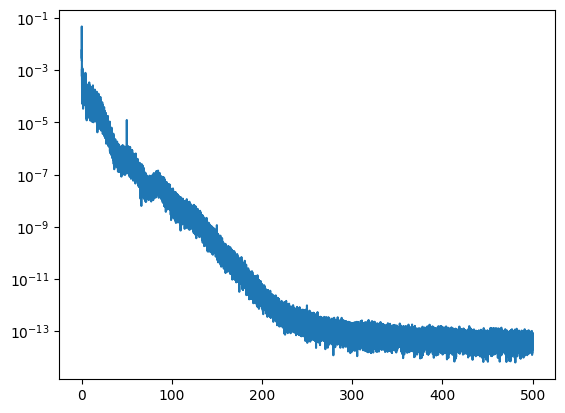

In [2]:
f, psd = sp.signal.welch(ecg_one_lead, fs_ecg, nperseg= N // 5 , axis = 0)
plt.figure()
plt.semilogy(f,psd/np.sum(psd))

### 2.3 PSD de los primeros 10 segundos de la señal

C:\Users\tobia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 225823 is greater than input length  = 10000, using nperseg = 10000
  warnings.warn('nperseg = {0:d} is greater than input length '


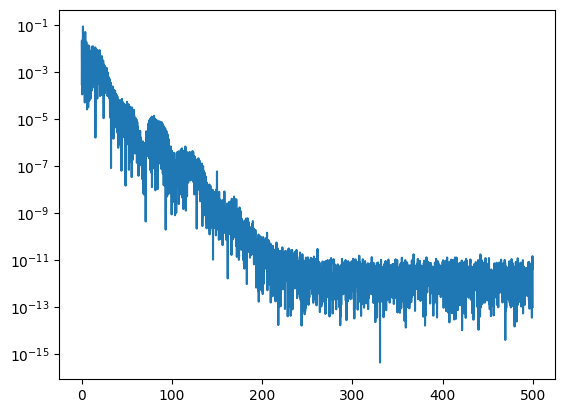

In [3]:
muestra_10s = ecg_one_lead[:10000]
f_10s, psd_10s = sp.signal.welch(muestra_10s, fs_ecg, nperseg= N // 5 , axis = 0)
plt.figure()
plt.semilogy(f_10s,psd_10s/np.sum(psd_10s))

### 2.4 PSD de latidos en la ventana R_i - 250ms - R_i + 350ms

C:\Users\tobia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 225823 is greater than input length  = 600, using nperseg = 600
  warnings.warn('nperseg = {0:d} is greater than input length '


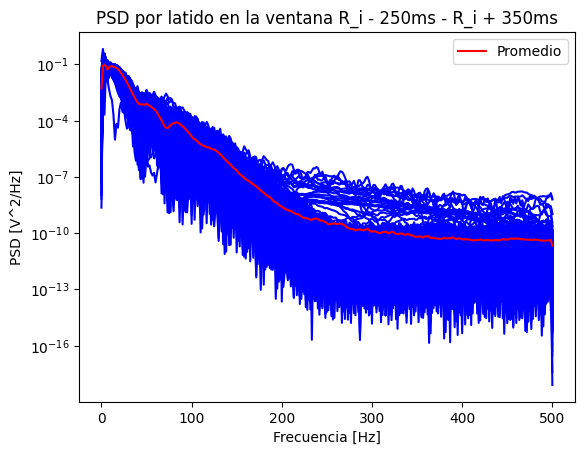

In [4]:
Pxx_vector = []

for r in qrs_d:
    if r < 250 or r > (len(ecg_one_lead) - 350):
        continue
    ventana = ecg_one_lead[int(r - 250) : int(r + 350)]
    f, Pxx = sp.signal.welch(ventana , fs_ecg , nperseg= N // 5 , axis = 0)
    Pxx = Pxx / np.sum(Pxx)
    Pxx_vector.append(Pxx)

# Promedio 
Pxx_prom = np.mean(Pxx_vector, axis=0)

for Pxx in Pxx_vector:
    plt.semilogy(f, Pxx, "b")
plt.title("PSD por latido en la ventana R_i - 250ms - R_i + 350ms")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [V^2/Hz]")

plt.semilogy(f, Pxx_prom, "r", label="Promedio")
plt.legend()
plt.show()

### 2.5 Cálculo de ancho de banda y definición de la plantilla

In [5]:
# Ancho de banda
area = np.sum(Pxx_prom)

acumulativo = np.cumsum(np.abs(Pxx_prom))

bw_lower = np.where(acumulativo >= 0.01 * area)[0][0]
bw_upper = np.where(acumulativo >= 0.99 * area)[0][0]


bw = f[bw_upper] - f[bw_lower]

# Límite inferior
threshold = 1 / np.sqrt(2) * np.max(Pxx_prom)

lower_limit = f[np.where(Pxx_prom >= threshold)[0][0]]

print("El ancho de banda de la señal es ",bw,"Hz, y el límite inferior, ",lower_limit,"Hz")

El ancho de banda de la señal es  38.333333333333336 Hz, y el límite inferior,  1.6666666666666667 Hz


A partir de los valores calculados, y según lo hablado en clase, se estableció la siguiente plantilla: 

- $ f_{s_{1}} = 0.1Hz $
- $ f_{p_{1}} = 0.5Hz $
- $ f_{p_{2}} = 30Hz $
- $ f_{s_{2}} = 40Hz $

## 3. Conclusiones

Se logró cumplir con la consigna. Se observa que la densidad espectral de potencia varía poco según dónde se calcule, resultando muy similar en los tres casos analizados.

A partir de lo realizado, se pudo estimar el ancho de banda de la señal, lo cual resultó útil para establecer una plantilla de filtrado que será utilizada en posteriores trabajos.